In [1]:
# CENSUS ADULT INCOME (Verificando datos)

#Importando librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
# leyendo el archivo csv con los datos
census_data_income = pd.read_csv('adult.csv')

In [3]:
#Viendo la data
census_data_income.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [4]:
# Ahora vemos el tamaño del Data Frame (Filas, Columnas)
census_data_income.shape

(32561, 15)

In [5]:
# Viendo la cantidad de información por columna (evitar vacíos)
census_data_income.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education.num     32561
marital.status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital.gain      32561
capital.loss      32561
hours.per.week    32561
native.country    32561
income            32561
dtype: int64

In [6]:
census_data_income.loc[census_data_income["sex"]=='Female'].head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
# Cantidad de personas censadas que obtuvieron mas del promedio
len(census_data_income.loc[census_data_income["income"]!='<=50K'])

7841

In [8]:
census_data_income.loc[census_data_income["income"]!='<=50K'].head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K


In [9]:
# muestra de la lista de personas censadas que ganan menos o igual a '50K' al año
census_data_income.loc[census_data_income["income"]=='<=50K'].head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
# describimos las características de las columnas numéricas
census_data_income.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
# vemos los valores para las variables categóricas 
cat_vars = ['education', 'workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country' ]
for var in cat_vars:
    print(f'{var}: ', census_data_income[var].unique())

education:  ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
workclass:  ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
marital.status:  ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation:  ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship:  ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
race:  ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
sex:  ['Female' 'Male']
native.country:  ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Tr

In [12]:
# convertimos los valores y los contabilizamos
print(f'total={len(census_data_income)}')
for var in cat_vars:
    print(f'{var}: ', [f'{v}={c} ({c/len(census_data_income):.2})' for v,c in zip(*np.unique(census_data_income[var], return_counts=True))])

total=32561
education:  ['10th=933 (0.029)', '11th=1175 (0.036)', '12th=433 (0.013)', '1st-4th=168 (0.0052)', '5th-6th=333 (0.01)', '7th-8th=646 (0.02)', '9th=514 (0.016)', 'Assoc-acdm=1067 (0.033)', 'Assoc-voc=1382 (0.042)', 'Bachelors=5355 (0.16)', 'Doctorate=413 (0.013)', 'HS-grad=10501 (0.32)', 'Masters=1723 (0.053)', 'Preschool=51 (0.0016)', 'Prof-school=576 (0.018)', 'Some-college=7291 (0.22)']
workclass:  ['?=1836 (0.056)', 'Federal-gov=960 (0.029)', 'Local-gov=2093 (0.064)', 'Never-worked=7 (0.00021)', 'Private=22696 (0.7)', 'Self-emp-inc=1116 (0.034)', 'Self-emp-not-inc=2541 (0.078)', 'State-gov=1298 (0.04)', 'Without-pay=14 (0.00043)']
marital.status:  ['Divorced=4443 (0.14)', 'Married-AF-spouse=23 (0.00071)', 'Married-civ-spouse=14976 (0.46)', 'Married-spouse-absent=418 (0.013)', 'Never-married=10683 (0.33)', 'Separated=1025 (0.031)', 'Widowed=993 (0.03)']
occupation:  ['?=1843 (0.057)', 'Adm-clerical=3770 (0.12)', 'Armed-Forces=9 (0.00028)', 'Craft-repair=4099 (0.13)', 'Exe

In [13]:
# Preparamos la data
cat_dict = dict()
for var in cat_vars:
    census_data_income[var] = census_data_income[var].astype('category')
    cat_dict[var] = {i+1:c for i,c in enumerate(census_data_income[var].cat.categories)} # lista de categorias
    census_data_income[var] = census_data_income[var].cat.codes+1

pprint(cat_dict)  
census_data_income.head()

{'education': {1: '10th',
               2: '11th',
               3: '12th',
               4: '1st-4th',
               5: '5th-6th',
               6: '7th-8th',
               7: '9th',
               8: 'Assoc-acdm',
               9: 'Assoc-voc',
               10: 'Bachelors',
               11: 'Doctorate',
               12: 'HS-grad',
               13: 'Masters',
               14: 'Preschool',
               15: 'Prof-school',
               16: 'Some-college'},
 'marital.status': {1: 'Divorced',
                    2: 'Married-AF-spouse',
                    3: 'Married-civ-spouse',
                    4: 'Married-spouse-absent',
                    5: 'Never-married',
                    6: 'Separated',
                    7: 'Widowed'},
 'native.country': {1: '?',
                    2: 'Cambodia',
                    3: 'Canada',
                    4: 'China',
                    5: 'Columbia',
                    6: 'Cuba',
                    7: 'Dominican-Republic',

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,1,77053,12,9,7,1,2,5,1,0,4356,40,40,<=50K
1,82,5,132870,12,9,7,5,2,5,1,0,4356,18,40,<=50K
2,66,1,186061,16,10,7,1,5,3,1,0,4356,40,40,<=50K
3,54,5,140359,6,4,1,8,5,5,1,0,3900,40,40,<=50K
4,41,5,264663,16,10,6,11,4,5,1,0,3900,40,40,<=50K


In [16]:
# Dividimos el Data Frame, entre los valores de entrada y lo que se debe predecir
x = census_data_income.drop('income', axis=1)
y = census_data_income['income'].astype('category')
#y = np.unique(census_data_income['income'], return_counts=True)
#y = census_data_income['income']

In [17]:
y.head(20)

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
5     <=50K
6     <=50K
7      >50K
8     <=50K
9      >50K
10     >50K
11     >50K
12     >50K
13     >50K
14     >50K
15     >50K
16     >50K
17     >50K
18     >50K
19     >50K
Name: income, dtype: category
Categories (2, object): [<=50K, >50K]

In [18]:
cat_y = dict()
cat_y = {i+1:c for i,c in enumerate(y.cat.categories)}

In [19]:
pprint(cat_y)  

{1: '<=50K', 2: '>50K'}


In [22]:
y = y.cat.codes+1

In [23]:
# Separamos el data frame para el Conjunto de Validación y Conjunto de Pruebas
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((26048, 14), (6513, 14), (26048,), (6513,))

In [25]:
#Aplicamos el Árbol de Decisión al conjunto de entrenamiento
m = DecisionTreeRegressor(max_depth=3)
m.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [26]:
#Hallamos el coeficiente de detrminación
# R^2: coefficient of determination
m.score(x_train, y_train)

0.36864212293413534

In [27]:
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,1,77053,12,9,7,1,2,5,1,0,4356,40,40
1,82,5,132870,12,9,7,5,2,5,1,0,4356,18,40
2,66,1,186061,16,10,7,1,5,3,1,0,4356,40,40
3,54,5,140359,6,4,1,8,5,5,1,0,3900,40,40
4,41,5,264663,16,10,6,11,4,5,1,0,3900,40,40


In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
dtype: int8

In [33]:
X = census_data_income[['education.num', 'age', 'hours.per.week', 'capital.gain']]

Y = census_data_income['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [34]:
X.head()

,education.num,age,hours.per.week,capital.gain
0,9,90,40,0
1,9,82,18,0
2,10,66,40,0
3,4,54,40,0
4,10,41,40,0


In [35]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

In [36]:
# Separamos el data frame para el Conjunto de Validación y Conjunto de Pruebas
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((26048, 4), (6513, 4), (26048,), (6513,))

In [37]:
#Aplicamos el Árbol de Decisión al conjunto de entrenamiento
m = DecisionTreeRegressor(max_depth=5)
m.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [38]:
from utils import draw_tree, waterfallplot

In [39]:
m.score(x_train, y_train)

0.31926315930740523

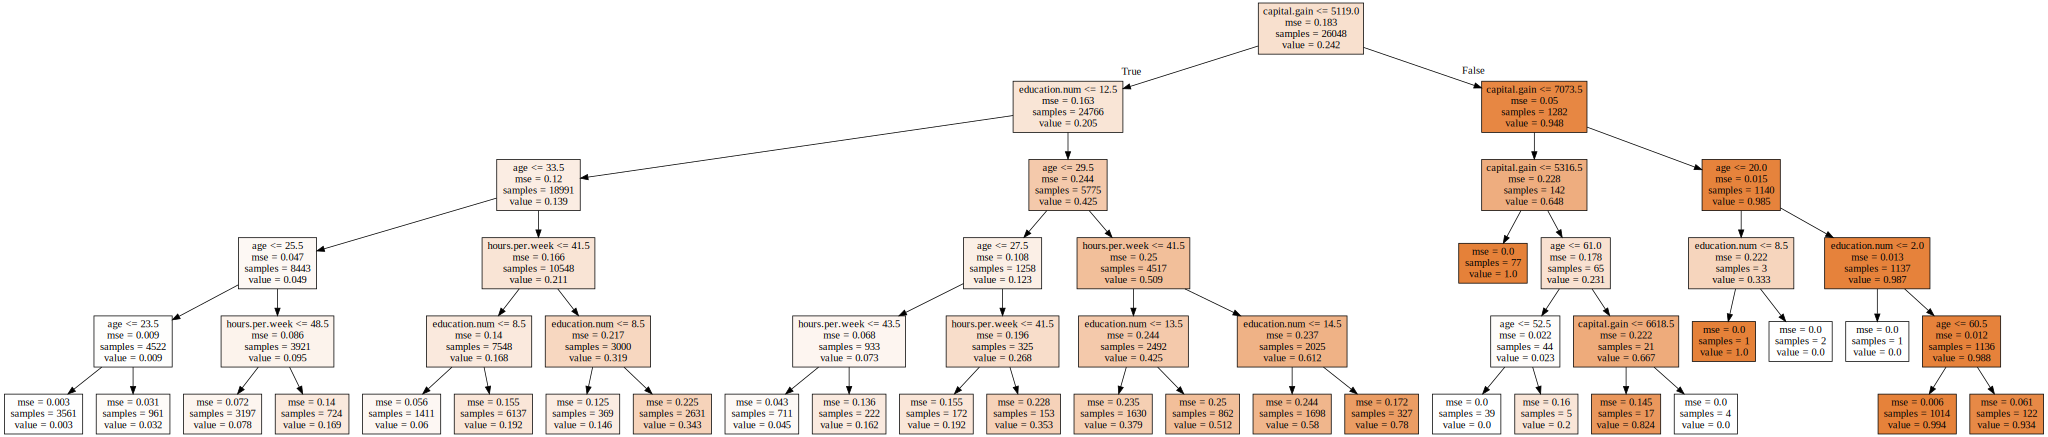

In [41]:
draw_tree(m, x_train)

In [42]:
# Prediciendo los resultados y dando un resultado
score = m.score(x_test, y_test)
print(score)

0.3124665123301107


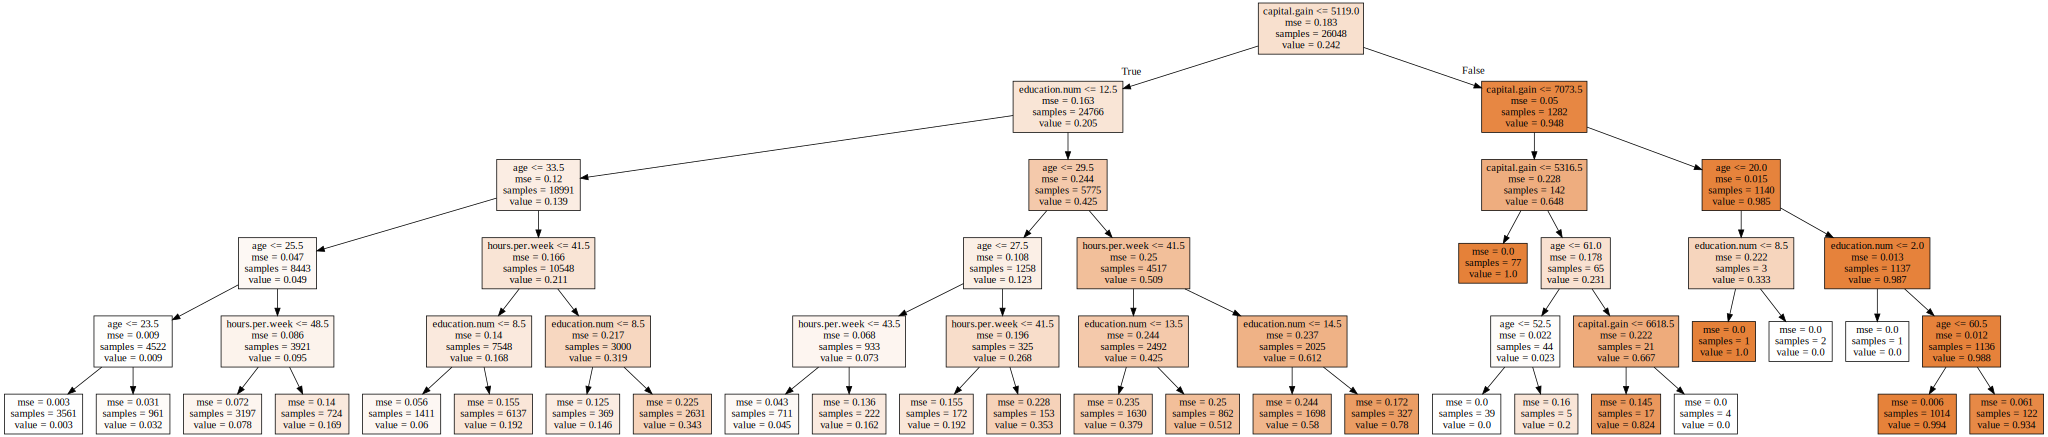

In [43]:
draw_tree(m, x_test)